In [1]:
import tensorflow as tf
import numpy as np

## 1. from_tensor_slices

In [13]:
train_x = np.arange(5).astype(np.float32).reshape(-1, 1)
train_y = 3*train_x + 1

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds

<TensorSliceDataset shapes: ((1,), (1,)), types: (tf.float32, tf.float32)>

In [14]:
for x, y in train_ds:
    print(x)
    print(y, '\n')

tf.Tensor([0.], shape=(1,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32) 

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([4.], shape=(1,), dtype=float32) 

tf.Tensor([2.], shape=(1,), dtype=float32)
tf.Tensor([7.], shape=(1,), dtype=float32) 

tf.Tensor([3.], shape=(1,), dtype=float32)
tf.Tensor([10.], shape=(1,), dtype=float32) 

tf.Tensor([4.], shape=(1,), dtype=float32)
tf.Tensor([13.], shape=(1,), dtype=float32) 



In [15]:
# TensorSliceDataset을 이용하면 tensorflow가 제공하는 shuffle(), batch() 등의 기능을 활용할 수 있다

train_x = np.arange(1000).astype(np.float32).reshape(-1, 1)
train_y = 3*train_x + 1

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(100).batch(32)

for x, y in train_ds:
    print(x.shape, y.shape, '\n')
    break;

(32, 1) (32, 1) 



## 2. Tensorflow, Keras에서 제공하는 Dataset

In [16]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(type(train_images))
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
# from_tensor_slices() 적용
from tensorflow.data import Dataset

train_ds = Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(9)

In [21]:
for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)

    break

(9, 28, 28)
(9,)


In [22]:
# 시각화를 위해 데이터 꺼내오기
import matplotlib.pyplot as plt

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

print(images.shape)
print(labels.shape)

(9, 28, 28)
(9,)


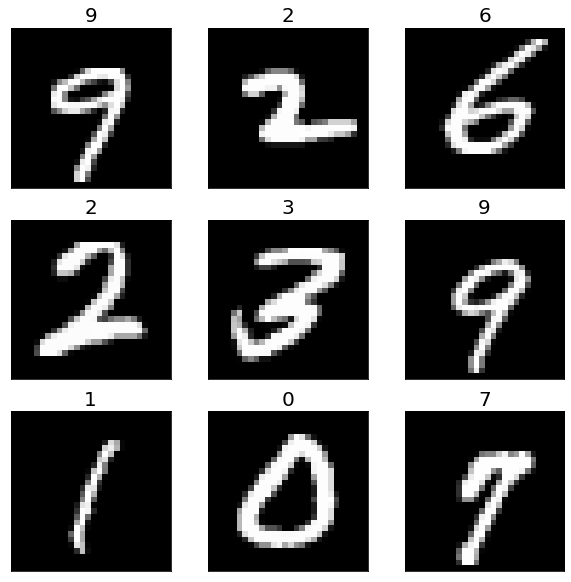

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax_idx, ax in enumerate(axes.flat):
    image = images[ax_idx, ...]
    label = labels[ax_idx]

    ax.imshow(image, 'gray')
    ax.set_title(label.numpy(), fontsize=20)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)